# Predicting heart disease using machine learning 
This notebook looks into using various Python-based maching learning and data science libraries in an attempt to build a maching learning model capable of predicting wether or not someone has heart disease based on their medical attributes

In [1]:
our_approach = [
    '1. problem definition',
    '2. Data',
    '3. Evaluation',
    '4. Features',
    '5. Modelling',
    '6. Experimentation'
]

## 1.  Problem definition
 > Given clinical parameters about a patient, can we predict wether or not they have heart disease?
 
 
## 2. Data
-- Cleavland data from Machine Learning Repostiory.

## 3. Evaluation
> If we can reach 95% accuracy as prediting whether or not a patient have a heart disease during the proof of concept, we'll persue the project.

## 4. Features
** create the data dictionary **
>id (Unique id for each patient).

>age (Age of the patient in years)

>origin (place of study)

>sex (Male/Female)

>cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

>trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

>chol (serum cholesterol in mg/dl)

>fbs (if fasting blood sugar > 120 mg/dl)

>restecg (resting electrocardiographic results)
 Values: [normal, stt abnormality, lv hypertrophy]

>thalach: maximum heart rate achieved

>exang: exercise-induced angina (True/ False)

>oldpeak: ST depression induced by exercise relative to rest

>slope: the slope of the peak exercise ST segment

>ca: number of major vessels (0-3) colored by fluoroscopy

>thal: [normal; fixed defect; reversible defect]

>num: the predicted attribute

>target: have disease or not (1=yes, 0=no) (= the predicted attribute)


Preparing the tools.

In [2]:
# import all the tools we need.

# regular EDA (exploratory data analysis) and plotting liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models form Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [4]:
# explorotory data analisis or EDA

eda_check_list = [
    '1. What questions are you trying solve ?',
    '2. What kind of data do we have and how do we treat different types ?',
    '3. What is missing from the data and how do you deal with it ?',
    '4. Where are the outliers and why should you care about them ?',
    '5. How can you add, change or remove to get more out of your data ?'
]

In [5]:
eda_check_list

['1. What questions are you trying solve ?',
 '2. What kind of data do we have and how do we treat different types ?',
 '3. What is missing from the data and how do you deal with it ?',
 '4. Where are the outliers and why should you care about them ?',
 '5. How can you add, change or remove to get more out of your data ?']

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<AxesSubplot: >

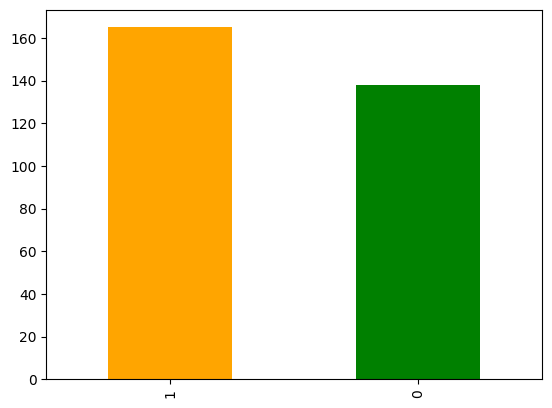

In [8]:
df["target"].value_counts().plot(kind="bar",color=["orange","green"])

In [9]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Heart disease frequency according to sex

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# compare the target column to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


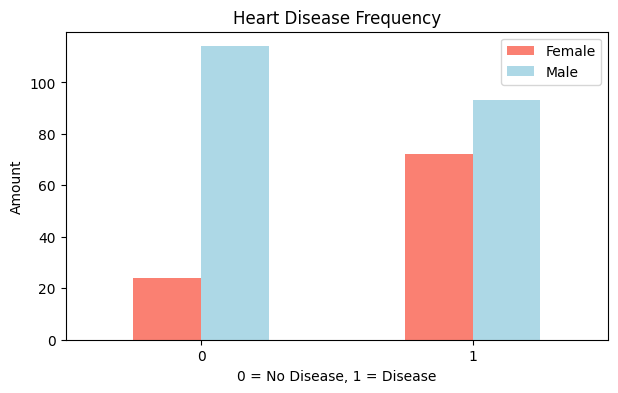

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(7,4),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);


In [14]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

Age vs. Max Heart Rate for Heart Disease

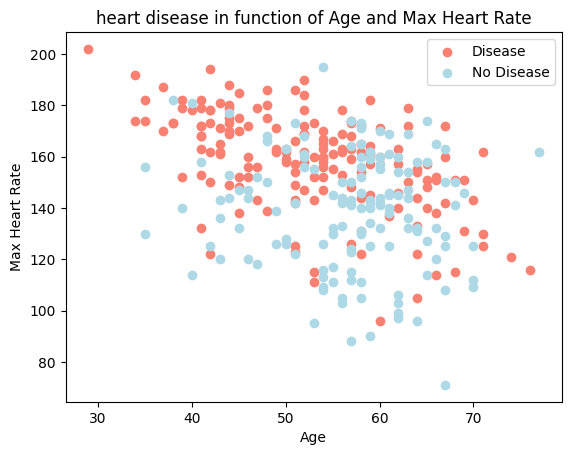

In [15]:
# create another figure

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

# adding some helpful info
plt.title("heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

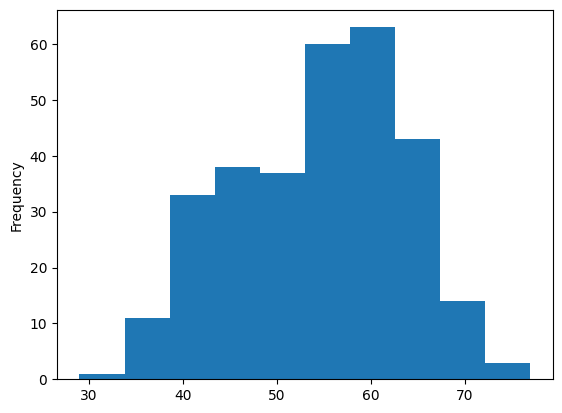

In [16]:
 df.age.plot.hist();

### heart disease per chest pain Type

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

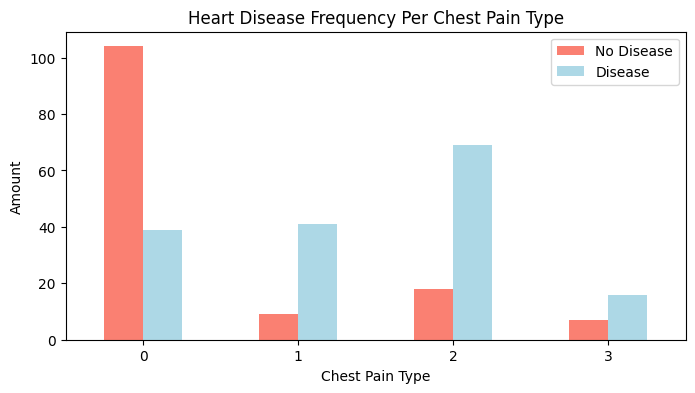

In [17]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(8,4),
                                  color=["salmon","lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

In [18]:
# correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


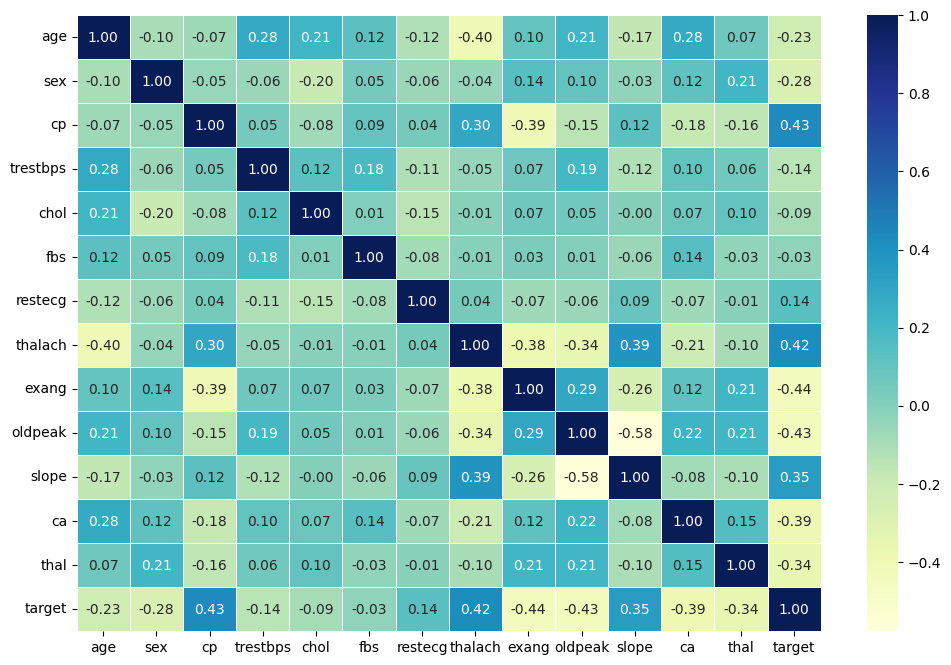

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=[12,8])
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [20]:
  np.random.seed(42)
x = df.drop("target", axis=1)
y = df["target"]
    
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2)

In [21]:
clf = RandomForestClassifier()

clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8524590163934426

# we are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [22]:
models = {"Logistic Regresssion":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

# create a funcion to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    x_trian = training data (no labels)
    x_test = testing data (no labels)
    y_train = training labels
    y_test = testing labels
    """
    np.random.seed(42)
    
    model_scores = {}
    
    for names, model in models.items():
        model.fit(x_train, y_train)
        model_scores[names] = model.score(x_test, y_test)
    return model_scores 

In [23]:
model_scores = fit_and_score(models=models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\sanket\anaconda3\envs\ML_1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regresssion': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

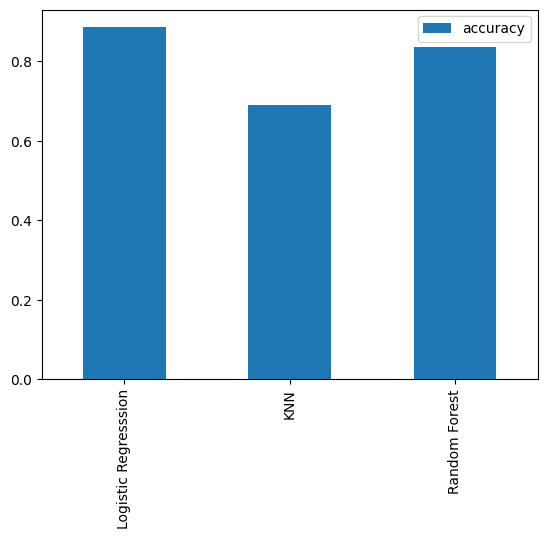

In [24]:
model_compare = pd.DataFrame(model_scores, index =[ "accuracy"])
model_compare.T.plot.bar();

we've got a baseline model..
Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

In [25]:
train_scores = []
test_scores = []

neighbors = range(1,21)
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algotithm
    knn.fit(x_train, y_train)
    
    # Update the trainging list 
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the score list
    test_scores.append(knn.score(x_test, y_test))
    

In [26]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


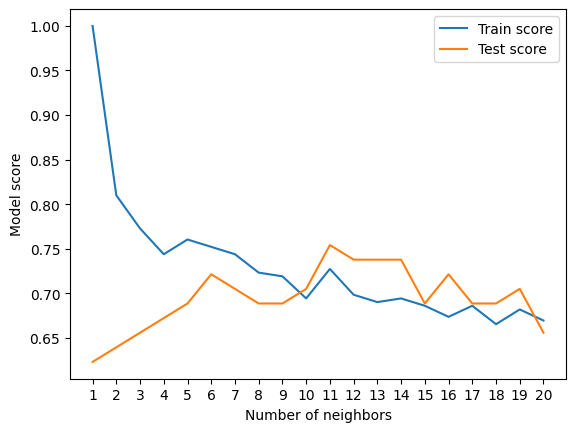

In [27]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

 * LogisticRegression()
 * RandomForestClassifier()

In [28]:
# hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(1,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,10,2)}

In [30]:
# Tuning logisticRegression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter =20,
                               verbose=True)

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [33]:
# tuning RandomForestClassifier()
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])},
                   verbose=True)

In [34]:
rs_rf.best_params_

{'n_estimators': 751,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [35]:
rs_rf.score(x_test, y_test)

0.8852459016393442

In [36]:
model_scores

{'Logistic Regresssion': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [32]:
# tuning GridSearchCV
np.random.seed(42)
log_reg_grid2 = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid2,
                               cv=5,
                               verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

# Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

..and it would be great if corss-validation was used where possible
TO make comparisonns and evaluate our trained model, firest we need to make predictions


In [35]:
y_preds = gs_log_reg.predict(x_test)

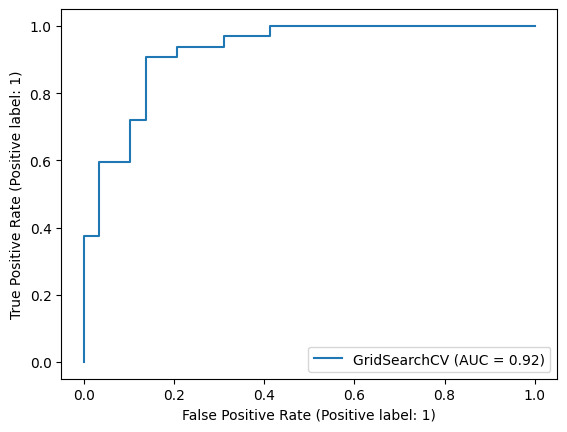

In [36]:
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

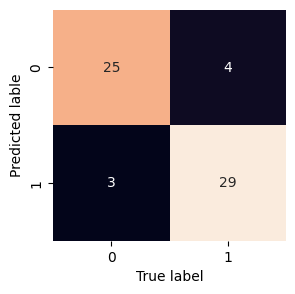

In [37]:
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted lable")
    
plot_conf_mat(y_test, y_preds) 

In [38]:
 print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [39]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

In [45]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv = 5,
                        scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [47]:
# Cross-validated Precision
cv_Precision = cross_val_score(clf,
                        x,
                        y,
                        cv = 5,
                        scoring = "precision")
cv_Precision = np.mean(cv_Precision)
cv_Precision

0.8215873015873015

In [48]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv = 5,
                        scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [50]:
# Cross-validated Accuracy
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv = 5,
                        scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [53]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_Precision,
                         "Recall": cv_recall,
                         "f1": cv_f1},
                         index = [0])

<AxesSubplot: title={'center': 'Cross-validated classification metrics'}>

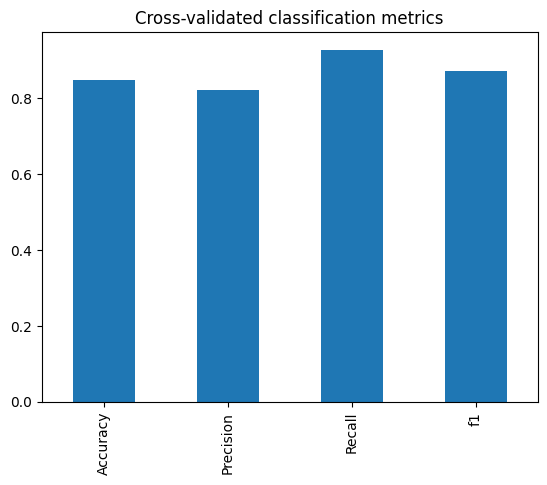

In [54]:
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",
                     legend = False)

# Feature Importance

Feature importance is another way of asking, "which featrue contributed most to the outcomes of the model and how did they contibute?"

Finding feature importance is different for each machine learning model

In [61]:
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [62]:
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [63]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

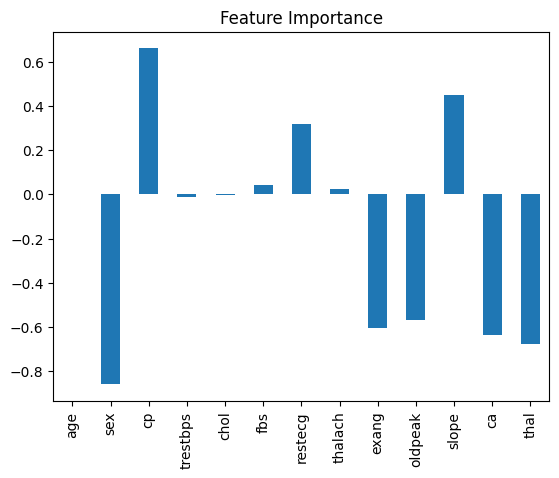

In [66]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

In [67]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. Experimentation
if you haven't hit you evaluation metric yet..... ask yourself..

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models?(beyond what we've done so far)
* If your model is good enough (you have hit you evaluation metric) how would you export it and share it with othets?